In [ ]:
%matplotlib inline


# Fit with Data in a pandas DataFrame

Simple example demonstrating how to read in the data using ``pandas`` and
supply the elements of the ``DataFrame`` to lmfit.


In [1]:
import pandas as pd

from lmfit.models import LorentzianModel

read the data into a pandas DataFrame, and use the ``x`` and ``y`` columns:



In [49]:
dframe = pd.read_csv('nvdi_2019.csv')

In [50]:
dframe["interval_to"] = pd.to_datetime(dframe["interval_to"])

In [51]:
dframe["interval_from"] = pd.to_datetime(dframe["interval_from"])

In [52]:
dframe

,Unnamed: 0,interval_from,interval_to,indices_NDVI_min,indices_NDVI_max,indices_NDVI_mean,indices_NDVI_stDev,indices_NDVI_sampleCount,indices_NDVI_noDataCount,indices_NDVI_percentiles_5.0,...,bands_B11_percentiles_50.0,bands_B12_min,bands_B12_max,bands_B12_mean,bands_B12_stDev,bands_B12_sampleCount,bands_B12_noDataCount,bands_B12_percentiles_5.0,bands_B12_percentiles_95.0,bands_B12_percentiles_50.0
0,0,2019-01-18,2019-01-19,0.3410,0.3410,0.3410,0.0,1,0,0.3410,...,0.0807,0.0624,0.0624,0.0624,0.0,1,0,0.0624,0.0624,0.0624
1,1,2019-01-21,2019-01-22,0.4296,0.4296,0.4296,0.0,1,0,0.4296,...,0.0812,0.0634,0.0634,0.0634,0.0,1,0,0.0634,0.0634,0.0634
2,2,2019-02-12,2019-02-13,0.3614,0.3614,0.3614,0.0,1,0,0.3614,...,0.0941,0.0741,0.0741,0.0741,0.0,1,0,0.0741,0.0741,0.0741
3,3,2019-02-15,2019-02-16,0.3368,0.3368,0.3368,0.0,1,0,0.3368,...,0.1248,0.0971,0.0971,0.0971,0.0,1,0,0.0971,0.0971,0.0971
4,4,2019-02-20,2019-02-21,0.2308,0.2308,0.2308,0.0,1,0,0.2308,...,0.1578,0.1346,0.1346,0.1346,0.0,1,0,0.1346,0.1346,0.1346
5,5,2019-02-25,2019-02-26,0.2578,0.2578,0.2578,0.0,1,0,0.2578,...,0.2079,0.1855,0.1855,0.1855,0.0,1,0,0.1855,0.1855,0.1855
6,6,2019-02-27,2019-02-28,0.2420,0.2420,0.2420,0.0,1,0,0.2420,...,0.2220,0.2033,0.2033,0.2033,0.0,1,0,0.2033,0.2033,0.2033
7,7,2019-03-07,2019-03-08,0.2240,0.2240,0.2240,0.0,1,0,0.2240,...,0.0863,0.0660,0.0660,0.0660,0.0,1,0,0.0660,0.0660,0.0660
8,8,2019-03-19,2019-03-20,0.3520,0.3520,0.3520,0.0,1,0,0.3520,...,0.0491,0.0354,0.0354,0.0354,0.0,1,0,0.0354,0.0354,0.0354
9,9,2019-03-22,2019-03-23,0.2950,0.2950,0.2950,0.0,1,0,0.2950,...,0.1762,0.1398,0.1398,0.1398,0.0,1,0,0.1398,0.1398,0.1398


In [53]:
dframe = dframe.set_index('interval_from')

In [54]:
dframe = dframe.drop(['Unnamed: 0', 'interval_to'], axis=1)

In [55]:
year = 2019
dates = pd.Series(pd.date_range(str(year) + "-01-01", str(year) + "-12-31", freq="D"))
days = dates.diff().astype("timedelta64[D]").fillna(1).cumsum()
df = pd.DataFrame({"year": dates.dt.year, "days": days})
df = df.set_index(dates)

In [56]:
test = df.join(dframe)

In [117]:
inter = test.interpolate(method='akima', limit_direction='both')

<AxesSubplot:xlabel='index', ylabel='indices_NDVI_mean'>

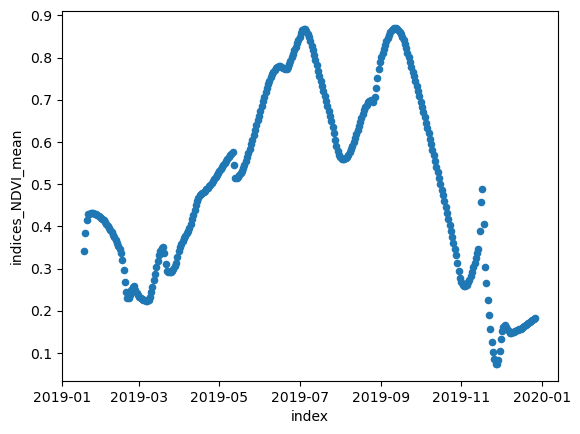

In [118]:
inter.reset_index().plot.scatter(y='indices_NDVI_mean', x='index')

<AxesSubplot:xlabel='index', ylabel='indices_NDVI_mean'>

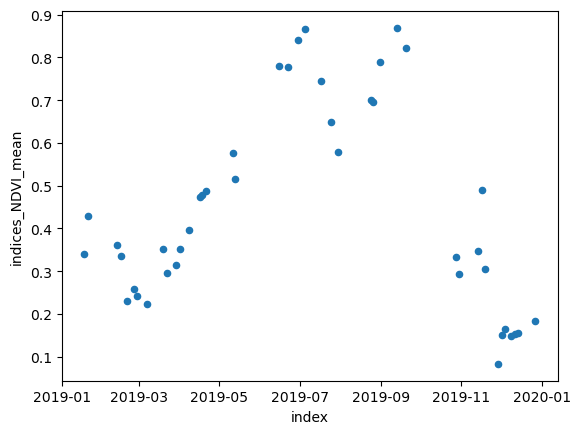

In [97]:
test.reset_index().plot.scatter(y='indices_NDVI_mean', x='index')

In [8]:

model = LorentzianModel()
params = model.guess(dframe['indices_NDVI_mean'], x=dframe.index)

result = model.fit(dframe['indices_NDVI_mean'], params, x=dframe.index)

and gives the fitting results:



and plot below:



In [9]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import numpy as np

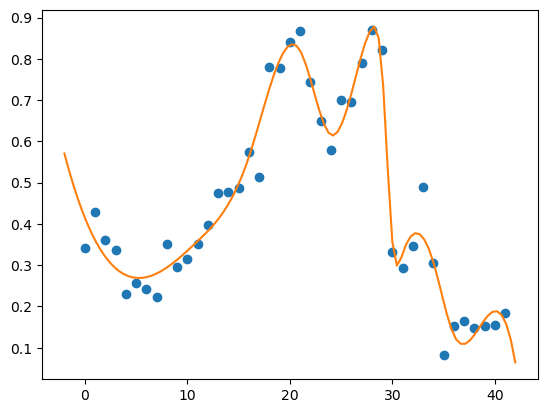

In [15]:
x = dframe.index
y = dframe["indices_NDVI_mean"]

s = UnivariateSpline(x, y, s=0.1)
xs = np.linspace(-2, len(x), 100)
ys = s(xs)

plt.plot(x, y, 'o')
plt.plot(xs, ys)
plt.show()

In [24]:
s(-1)

array(-0.22458722)